<a href="https://colab.research.google.com/github/FlakysB/Webscraping-EDA/blob/main/webscraping2_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WEB SCRAPING PROJECT**

**AIM:** The objective of this project is to effectively scrape a dataset of 1000 houses for rent from Nigerian Property Centre, meticulously clean the data to ensure its quality, and then conduct the following analyses:

🏡 Calculate the average rental price of homes based on their locations.

🏡 Determine the average rental price of homes within different Nigerian states.

🏡 Identify the most prevalent types of houses available for rent.

🏡 Compute the average rental price for each house type.

This project aims to provide valuable insights into the rental housing market in Nigeria by leveraging web scraping and data analysis techniques.

In [ ]:
# Import necessary libaries for webscraping
import pandas as pd # To transfer our data to a csv document
from bs4 import BeautifulSoup # Help to pass html and enable us access information for our website
import re # Regular Expression(re) will be used for data manipulation e.g matching,searching.
import requests # It will help get url, get information from website and pass to beautiful soup.

In [ ]:
#Get url
url = 'https://nigeriapropertycentre.com//for-rent/'
#/for-rent/flats-apartments/showtype
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36 Edg/117.0.2045.60'}

response = requests.get(url, headers=headers)
print(response.status_code)

200


In [ ]:
res = response.content
soup = BeautifulSoup(res, 'html.parser')

In [ ]:
print(soup.title)
print(soup.title.string)
#print(soup.prettify)

<title>Real Estate &amp; Property in Nigeria for Sale and Rent - Nigeria Property Centre (NPC)</title>
Real Estate & Property in Nigeria for Sale and Rent - Nigeria Property Centre (NPC)


In [ ]:
listings = []

# Define the maximum number of rows you want (1000)
max_rows = 1000

# Initialize a variable to keep track of the total rows scraped
total_rows = 0

# Loop until you reach the desired number of rows or run out of pages
page_number = 1

while total_rows < max_rows:
    url = f'https://nigeriapropertycentre.com/for-rent/flats-apartments/showtype=1&page={page_number}'
    headers = {
        'User-Agent': 'Your User Agent String'
    }

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, "html.parser")

    cards = soup.find_all('div', itemprop='itemListElement')

    # Check if there are no more listings on the current page
    if not cards:
        break

    for card in cards:
        description = card.find('h4').get_text()

        # Check if the description includes the term "rent"
        if "rent" in description.lower():
            name = card.find('h3', itemprop='name').get_text()
            location = card.find('address', class_='voffset-bottom-10').get_text()
            price = card.find('span', class_='pull-sm-left').get_text()
            details = card.find('div', class_='wp-block-footer').get_text()

            listings.append([name, description, location, price, details])

            total_rows += 1

            # If the desired number of rows has been reached, exit the loop
            if total_rows >= max_rows:
                break

    # Move to the next page
    page_number += 1

# Print the scraped listings
for listing in listings:
  print(listing)


In [ ]:
df = pd.DataFrame(listings, columns=['Name', 'Description', 'Location','price in Naira','Details'])
df.head()

,Name,Description,Location,price in Naira,Details
0,Room Self Contain,Self contain (single rooms) for rent,"Ikate Elegushi, Lekki, Lagos","\n₦900,000 per annum",\n1 Bathroom1 Toilet Save\n
1,11 Units 3 Bedroom Apartment,3 bedroom flat / apartment for rent,"Old Ikoyi, Ikoyi, Lagos","\n₦15,000,000 per annum",\n3 Bedrooms4 Toilets Save\n
2,One Bedroom Flat,1 bedroom flat / apartment for rent,"News Engineering Side, Dawaki, Gwarinpa, Abuja","\n₦1,300,000 per annum",\n1 Bedroom1 Bathroom1 Parking Space Save\n
3,Luxury 3 Bedroom Apartment + Bq+gym+pool,3 bedroom flat / apartment for rent,"Banana Island, Ikoyi, Lagos","\n₦16,550,000 per annum",\n3 Bedrooms2 Bathrooms3 Toilets2 Parking Spac...
4,Top Range Luxury 3 Bedroom Apartment+bq+tennis...,3 bedroom flat / apartment for rent,"Old Ikoyi, Ikoyi, Lagos","\n₦25,000,000 per annum",\n3 Bedrooms3 Bathrooms4 Toilets2 Parking Spac...


In [ ]:
df.shape

(1000, 5)

In [ ]:
# To convert my data to csv and download to my PC .
df.to_csv('Houserent_csv', index = True)

In [ ]:
df.tail()

,Name,Description,Location,price in Naira,Details
995,Luxury 3 Bedroom Apartment,3 bedroom flat / apartment for rent,"Lakowe Golf, Lakowe, Ibeju Lekki, Lagos","\n₦1,200,000 per annum",\n3 Bedrooms3 Bathrooms4 Toilets Save\n
996,Luxury 3 Bedroom Apartment+bq+gym Pool Etc,3 bedroom flat / apartment for rent,"Old Ikoyi, Old Ikoyi, Ikoyi, Lagos","\n₦21,000,000 per annum",\n3 Bedrooms3 Bathrooms4 Toilets2 Parking Spac...
997,Newly Built 2 Bedroom Apartment,2 bedroom flat / apartment for rent,"Safe And Secured Estate, Sangotedo, Ajah, Lagos","\n₦2,000,000 per annum",\n2 Bedrooms2 Bathrooms3 Toilets Save\n
998,3 Bedroom Apartment Available,3 bedroom flat / apartment for rent,"Banana Island, Ikoyi, Lagos","\n₦7,000,000 per annum",\n3 Bedrooms3 Bathrooms4 Toilets Save\n
999,Luxury 3 Bedroom Waterfront Apartment + Bq+pool,3 bedroom flat / apartment for rent,"Banana Island, Ikoyi, Lagos","\n₦16,000,000 per annum",\n3 Bedrooms3 Bathrooms4 Toilets2 Parking Spac...


In [ ]:
df.sample(5)

,Name,Description,Location,price in Naira,Details
939,Luxury 2 Bedroom Apartment,2 bedroom flat / apartment for rent,"Safe And Secured Estate, Sangotedo, Ajah, Lagos","\n₦1,800,000 per annum",\n2 Bedrooms2 Bathrooms3 Toilets Save\n
411,Luxury 3 Bedroom Waterfront Apartment + Bq+pool,3 bedroom flat / apartment for rent,"Banana Island, Ikoyi, Lagos","\n₦16,000,000 per annum",\n3 Bedrooms3 Bathrooms4 Toilets2 Parking Spac...
864,Luxury 3 Bedroom Apartment + Bq+gym+pool,3 bedroom flat / apartment for rent,"Banana Island, Ikoyi, Lagos","\n₦16,550,000 per annum",\n3 Bedrooms2 Bathrooms3 Toilets2 Parking Spac...
748,Luxury Ocean Facing 3 Bedroom Apartment+bq+gym...,3 bedroom flat / apartment for rent,"Banana Island, Ikoyi, Lagos","\n$20,001 per annum \napprox. ₦15,631,776\n",\n3 Bedrooms3 Bathrooms4 Toilets2 Parking Spac...
783,Newly Built Luxury Furnished 3bedroom Penthouse,3 bedroom flat / apartment for rent,"Ahmadu Bello Way, Victoria Island (VI), Lagos","\n₦30,000,000 per annum",\n3 Bedrooms3 Bathrooms4 Toilets2 Parking Spac...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            1000 non-null   object
 1   Description     1000 non-null   object
 2   Location        1000 non-null   object
 3   price in Naira  1000 non-null   object
 4   Details         1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


In [ ]:
# Clean the data
# Remove extra whitespace from all columns
clean_df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Remove the "Save" text from the "Description" column
df['Description'] = df['Description'].str.replace('Save', '')

# Remove the currency symbol and commas from the "price" column and convert it to an integer type
df['price in Naira'] = df['price in Naira'].str.replace(',', '').str.extract(r'(\d+)').astype(int)
# Step 3: Save the cleaned data to a new CSV file
#clean_df.to_csv('cleaned_data.csv', index=False)


In [ ]:
clean_df.head()

,Name,Description,Location,price in Naira,Details
0,Room Self Contain,Self contain (single rooms) for rent,"Ikate Elegushi, Lekki, Lagos",900000,1 Bathroom1 Toilet Save
1,11 Units 3 Bedroom Apartment,3 bedroom flat / apartment for rent,"Old Ikoyi, Ikoyi, Lagos",15000000,3 Bedrooms4 Toilets Save
2,One Bedroom Flat,1 bedroom flat / apartment for rent,"News Engineering Side, Dawaki, Gwarinpa, Abuja",1300000,1 Bedroom1 Bathroom1 Parking Space Save
3,Luxury 3 Bedroom Apartment + Bq+gym+pool,3 bedroom flat / apartment for rent,"Banana Island, Ikoyi, Lagos",16550000,3 Bedrooms2 Bathrooms3 Toilets2 Parking Spaces...
4,Top Range Luxury 3 Bedroom Apartment+bq+tennis...,3 bedroom flat / apartment for rent,"Old Ikoyi, Ikoyi, Lagos",25000000,3 Bedrooms3 Bathrooms4 Toilets2 Parking Spaces...


In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            1000 non-null   object
 1   Description     1000 non-null   object
 2   Location        1000 non-null   object
 3   price in Naira  1000 non-null   int64 
 4   Details         1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [ ]:
clean_df['Description'].unique()

array(['Self contain (single rooms) for rent',
       '3 bedroom flat / apartment for rent',
       '1 bedroom flat / apartment for rent',
       '2 bedroom flat / apartment for rent',
       '4 bedroom flat / apartment for rent',
       '1 bedroom mini flat (room and parlour) for rent'], dtype=object)

In [ ]:
# Import more libaries for exploratory analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
# Average price of homes by location
avgPrice_location = clean_df.groupby("Location")["price in Naira"].mean(). astype(int)
print('Average Price in Naira Per', avgPrice_location)

Average Price in Naira Per Location
Ahmadu Bello Way, Victoria Island (VI), Lagos      30000000
Banana Island, Ikoyi, Lagos                         9944188
Eko Atlantic City, Lagos                           40000000
Hopeville Estate, Sangotedo, Ajah, Lagos            2000000
Ikate Elegushi, Lekki, Lagos                         900000
Lakowe Golf, Lakowe, Ibeju Lekki, Lagos             1200000
News Engineering Side, Dawaki, Gwarinpa, Abuja      1300000
Off Queens Drive, Ikoyi, Lagos                      6000000
Old Ikoyi, Ikoyi, Lagos                            17451707
Old Ikoyi, Old Ikoyi, Ikoyi, Lagos                 21000000
Oniru, Victoria Island (VI), Lagos                  5000000
Orchid Road, Chevron, Eleganza, Lekki, Lagos        2300000
Peninsula Garden Estate, Sangotedo, Ajah, Lagos     2400000
Safe And Secured Estate, Sangotedo, Ajah, Lagos     1901052
Secured Estate, Sangotedo, Ajah, Lagos              2000000
Name: price in Naira, dtype: int64


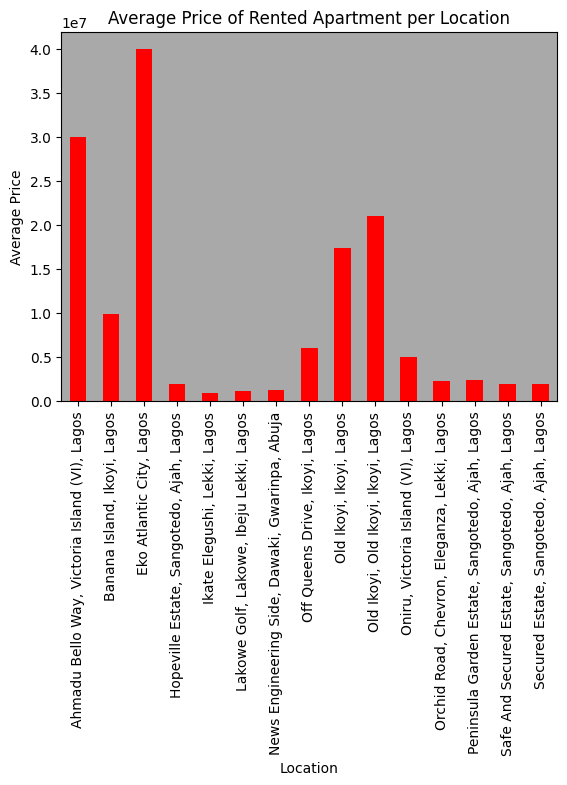

In [ ]:
#Barchart of Average price per location.
Barchart= avgPrice_location.plot.bar()
Barchart.set_title("Average Price of Rented Apartment per Location")
plt.ylabel("Average Price")
for patch in Barchart.patches:
    patch.set_facecolor('red')
#Barchart.patches[''].set_facecolor('red')
Barchart.set_facecolor('darkgrey')
Barchart.get_figure().show()

In [ ]:
#  Average price of homes by states
avgPrice_states = clean_df.groupby('Location')['price in Naira'].mean()

# Round the values in 'vgPrice' to 2 decimal places
avgPrice_states = avgPrice_states.astype(int)

# Create a DataFrame with the average prices
avgPrice_states_df = pd.DataFrame({'States': avgPrice_states.index, 'Average Price in Naira': avgPrice_states.values})

# Print the DataFrame
print(avgPrice_states_df)

                                             States  Average Price in Naira
0     Ahmadu Bello Way, Victoria Island (VI), Lagos                30000000
1                       Banana Island, Ikoyi, Lagos                 9944188
2                          Eko Atlantic City, Lagos                40000000
3          Hopeville Estate, Sangotedo, Ajah, Lagos                 2000000
4                      Ikate Elegushi, Lekki, Lagos                  900000
5           Lakowe Golf, Lakowe, Ibeju Lekki, Lagos                 1200000
6    News Engineering Side, Dawaki, Gwarinpa, Abuja                 1300000
7                    Off Queens Drive, Ikoyi, Lagos                 6000000
8                           Old Ikoyi, Ikoyi, Lagos                17451707
9                Old Ikoyi, Old Ikoyi, Ikoyi, Lagos                21000000
10               Oniru, Victoria Island (VI), Lagos                 5000000
11     Orchid Road, Chevron, Eleganza, Lekki, Lagos                 2300000
12  Peninsul

In [ ]:

# Extract the state information from the 'Location' column
clean_df['State'] = clean_df['Location'].str.split(',').str[-1].str.strip()

# Calculate the average price of homes by states
avgPrice_states = clean_df.groupby('State')['price in Naira'].mean()

# Make values in 'avgPrice_states' a whole number
avgPrice_states = avgPrice_states.astype(int)

# Create a DataFrame with the average prices
avgPrice_states_df = pd.DataFrame({'States': avgPrice_states.index, 'Average Price in Naira': avgPrice_states.values})

# Print the DataFrame
print(avgPrice_states_df)


  States  Average Price in Naira
0  Abuja                 1300000
1  Lagos                11990015


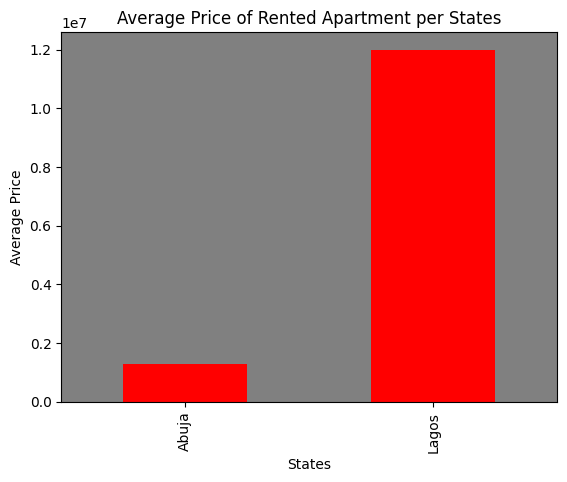

In [ ]:
# Barchart of Average price per states
Barchart = avgPrice_states_df.plot.bar(x='States', y='Average Price in Naira', legend=False)
Barchart.set_title("Average Price of Rented Apartment per States")
for patch in Barchart.patches:
  patch.set_facecolor('red')
Barchart.set_facecolor('gray')
plt.ylabel("Average Price")
plt.xlabel("States")
plt.show()

In [ ]:
# Popular House Type.
popularHouseType = clean_df.groupby('Description')["Name"].count()
print(popularHouseType)

Description
1 bedroom flat / apartment for rent                 48
1 bedroom mini flat (room and parlour) for rent     15
2 bedroom flat / apartment for rent                299
3 bedroom flat / apartment for rent                526
4 bedroom flat / apartment for rent                 94
Self contain (single rooms) for rent                18
Name: Name, dtype: int64


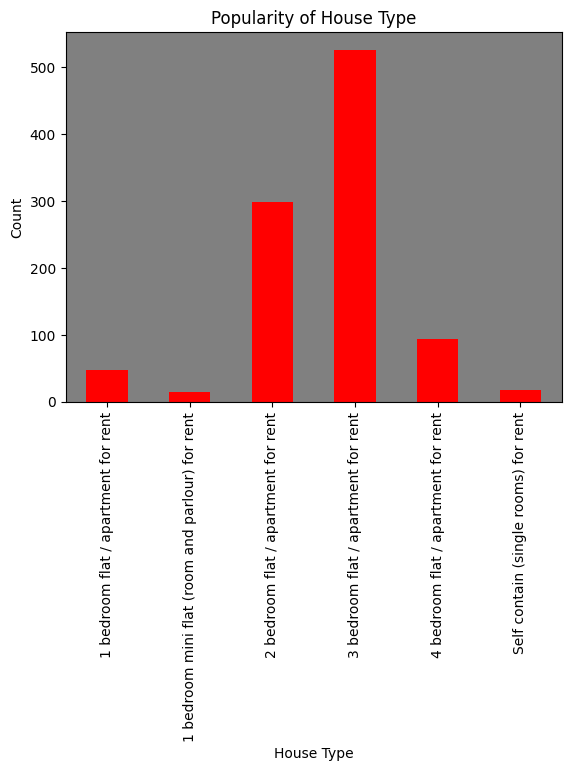

In [ ]:
Barchart = popularHouseType.plot.bar()
Barchart.set_title('Popularity of House Type')
for patch in Barchart.patches:
  patch.set_facecolor('red')
Barchart.set_facecolor('gray')
plt.xlabel("House Type")
plt.ylabel("Count")
plt.show()


In [ ]:
# Average Price of House Type.
averagePriceHouseType = clean_df.groupby('Description')["price in Naira"].mean().astype(int)
print(averagePriceHouseType)

Description
1 bedroom flat / apartment for rent                 1300000
1 bedroom mini flat (room and parlour) for rent     2300000
2 bedroom flat / apartment for rent                 9055518
3 bedroom flat / apartment for rent                13583916
4 bedroom flat / apartment for rent                16075050
Self contain (single rooms) for rent                 900000
Name: price in Naira, dtype: int64


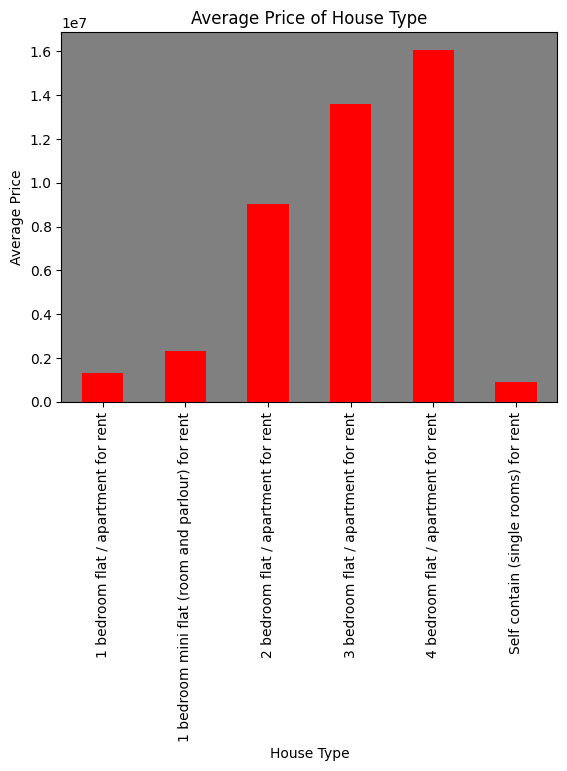

In [ ]:
Barchart = averagePriceHouseType.plot.bar()
Barchart.set_title("Average Price of House Type")
for patch in Barchart.patches:
  patch.set_facecolor('red')
Barchart.set_facecolor('gray')
plt.xlabel('House Type')
plt.ylabel('Average Price')
plt.show()